# NFL Injury Analysis - Initial Data Exploration

This notebook performs initial exploration of the processed NFL play and injury data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plotting style
plt.style.use('ggplot')  # Use a valid matplotlib style
sns.set_style('whitegrid')  # Set seaborn style
sns.set_palette('husl')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Load Processed Data

In [2]:
# Load processed play data
play_data_path = Path('../data/processed/processed_plays.parquet')
if play_data_path.exists():
    plays_df = pd.read_parquet(play_data_path)
    print(f"Loaded {len(plays_df)} plays")
    print("\nColumns:")
    print(plays_df.columns.tolist())
else:
    print(f"Play data not found at {play_data_path}")

Loaded 241428 plays

Columns:
['play_type', 'yards_gained', 'down', 'game_seconds_remaining', 'yardline_100', 'score_differential', 'surface', 'pass', 'rush', 'sack', 'touchdown', 'interception', 'fumble', 'penalty', 'play_clock', 'half_seconds_remaining', 'game_half', 'posteam_score', 'defteam_score', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'home_team', 'away_team', 'sp', 'qtr', 'drive', 'time_of_day', 'stadium', 'roof', 'start_time', 'stadium_id', 'game_stadium', 'game_date', 'week', 'season', 'game_id', 'play_id', 'quarter', 'quarter_seconds_remaining', 'score_differential_category']


## Basic Data Exploration

In [3]:
if 'plays_df' in locals():
    # Display basic statistics
    print("Basic Statistics:")
    print(plays_df.describe())
    
    # Check for missing values
    print("\nMissing Values:")
    missing_values = plays_df.isnull().sum()
    print(missing_values[missing_values > 0])

Basic Statistics:
        yards_gained           down  game_seconds_remaining   yardline_100  score_differential           pass           rush           sack      touchdown   interception         fumble        penalty  half_seconds_remaining  posteam_score  defteam_score  posteam_timeouts_remaining  defteam_timeouts_remaining             sp            qtr          drive           week         season        play_id        quarter  quarter_seconds_remaining
count  241428.000000  241428.000000           241428.000000  241428.000000       241428.000000  241428.000000  241428.000000  241428.000000  241428.000000  241428.000000  241428.000000  241428.000000           241428.000000  241428.000000  241428.000000               241428.000000               241428.000000  241428.000000  241428.000000  241428.000000  241428.000000  241428.000000  241428.000000  241428.000000              241428.000000
mean        3.994359       1.986228             1706.881958      48.714993           -1.249702    

## Play Type Analysis

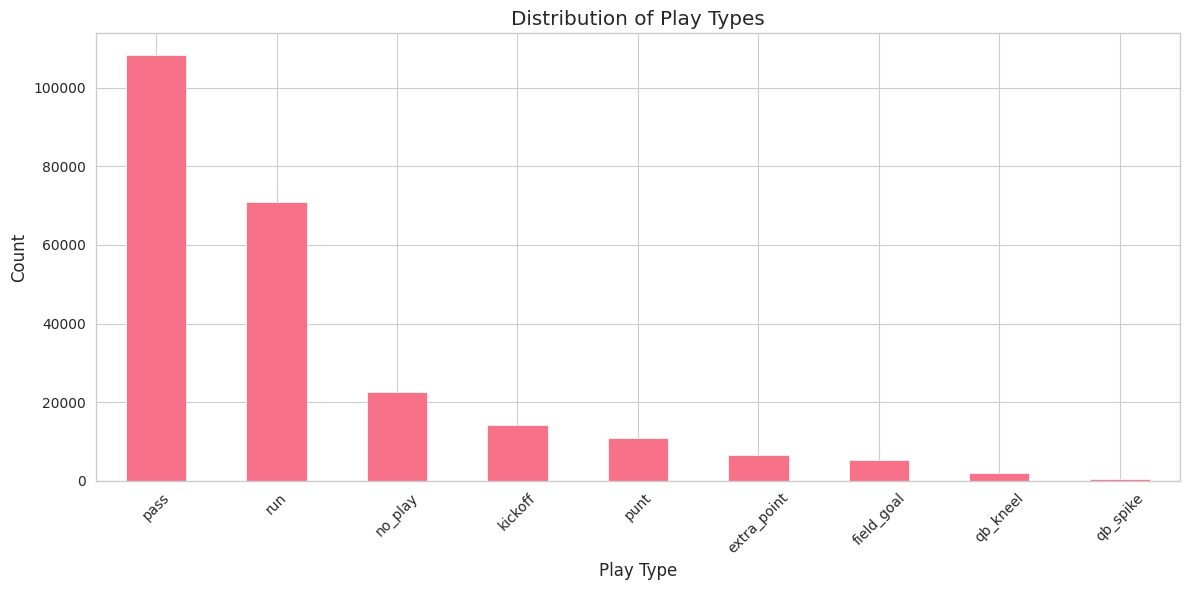

In [4]:
if 'plays_df' in locals() and 'play_type' in plays_df.columns:
    # Count plays by type
    play_type_counts = plays_df['play_type'].value_counts()
    
    # Create bar plot
    plt.figure(figsize=(12, 6))
    play_type_counts.plot(kind='bar')
    plt.title('Distribution of Play Types')
    plt.xlabel('Play Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Yards Gained

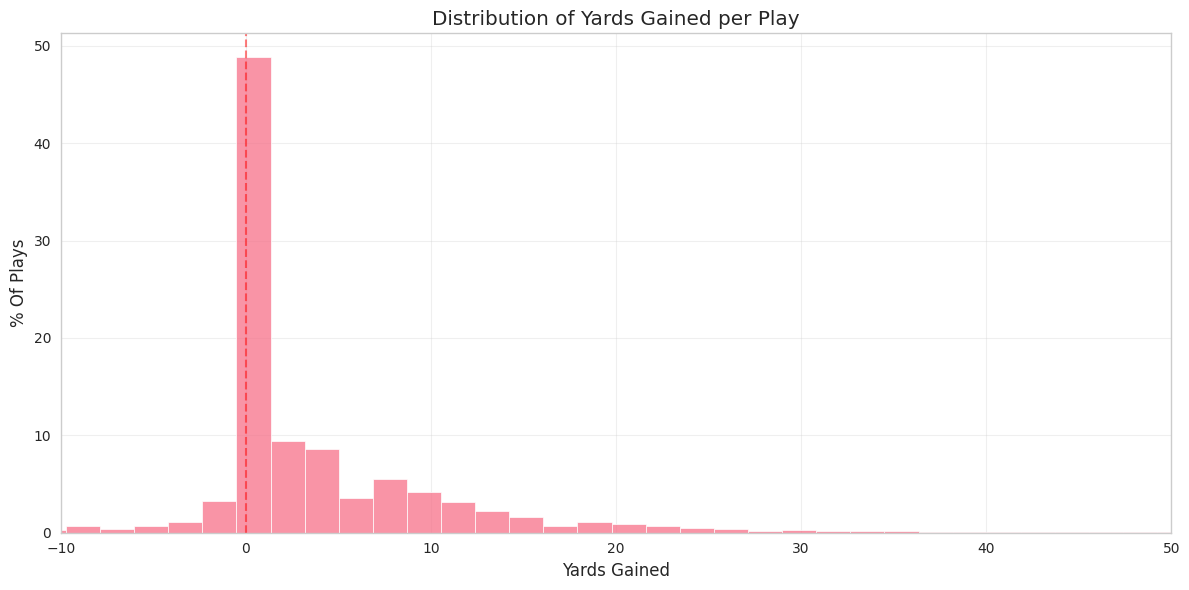

Mean yards gained: 3.99
Median yards gained: 1.00
Standard deviation: 7.75
Percentage of plays with negative yards: 6.65%
Percentage of plays with 0 yards: 41.78%


In [23]:
# Yards Gained Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=plays_df, x='yards_gained', bins=70, stat="percent")
plt.title('Distribution of Yards Gained per Play')
plt.xlabel('Yards Gained')
plt.ylabel('% Of Plays')
plt.xlim(-10, 50)  # Adjusted x-axis limits to focus on most common ranges
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)  # Add vertical line at 0 yards
plt.grid(True, alpha=0.3)  # Add grid for better readability
plt.tight_layout()
plt.show()

# Print some key statistics
print(f"Mean yards gained: {plays_df['yards_gained'].mean():.2f}")
print(f"Median yards gained: {plays_df['yards_gained'].median():.2f}")
print(f"Standard deviation: {plays_df['yards_gained'].std():.2f}")
print(f"Percentage of plays with negative yards: {(plays_df['yards_gained'] < 0).mean()*100:.2f}%")
print(f"Percentage of plays with 0 yards: {(plays_df['yards_gained'] == 0).mean()*100:.2f}%")

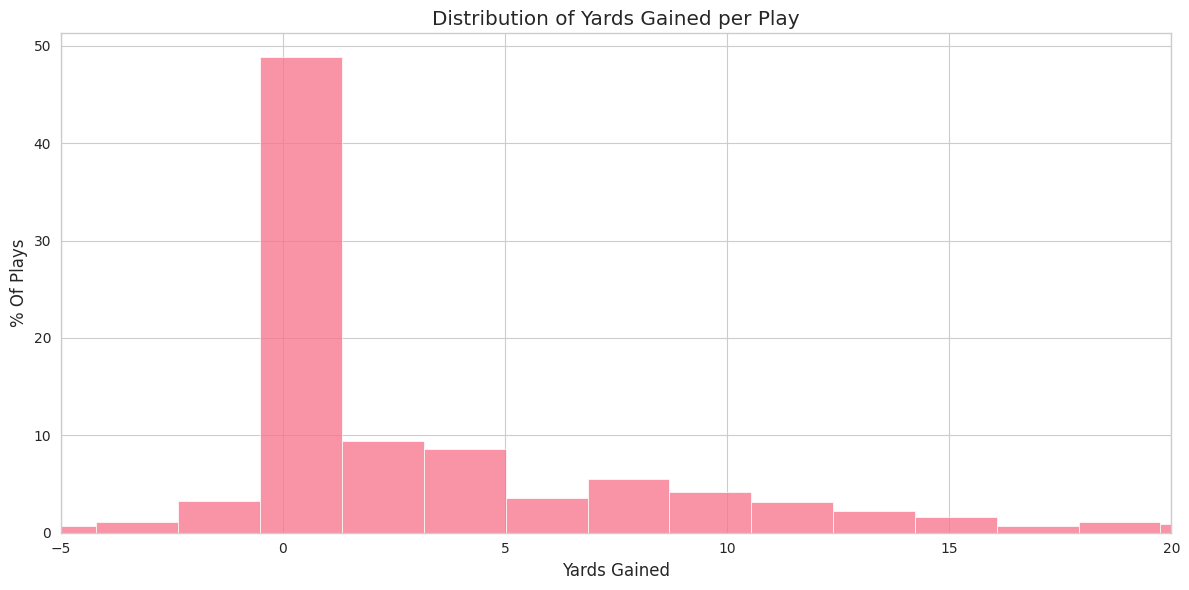

In [24]:
#Let's examine between -5 and 20 yards gained more closely
# Yards Gained Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=plays_df, x='yards_gained', bins=70, stat="percent")
plt.title('Distribution of Yards Gained per Play')
plt.xlabel('Yards Gained')
plt.ylabel('% Of Plays')
plt.xlim(-5, 20)  # Set x-axis limits
plt.tight_layout()
plt.show()

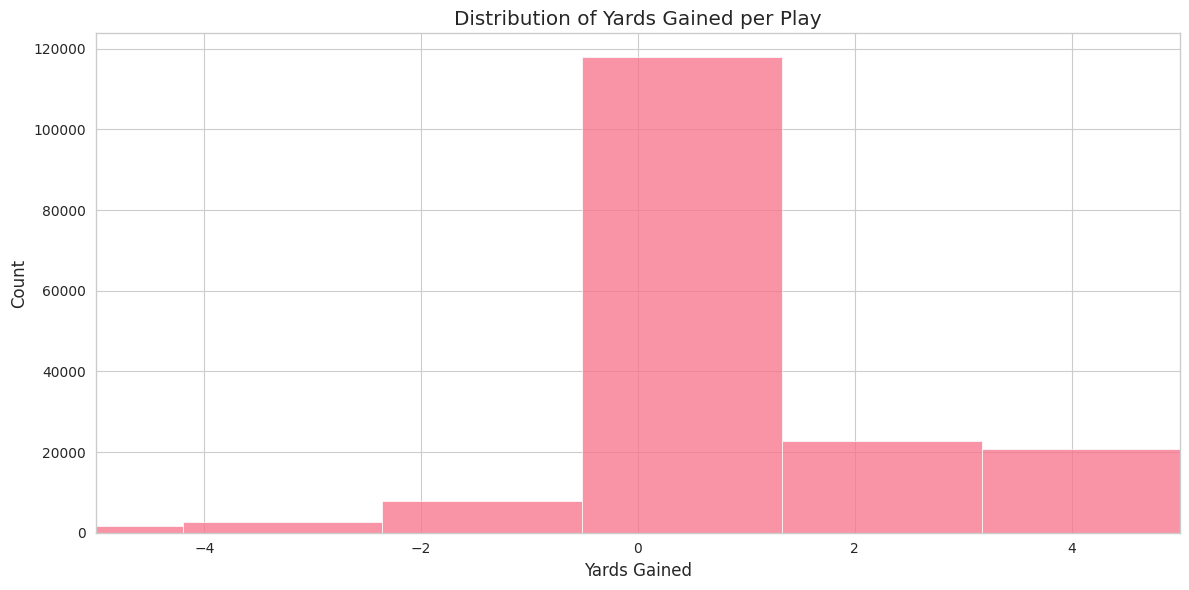

In [16]:
#seeing so many plays near 0 yards makes me curious to look between -5 and 5 yards. 
#it seems the vast majority of plays are near 0 net gain or loss
# Yards Gained Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=plays_df, x='yards_gained', bins=70)
plt.title('Distribution of Yards Gained per Play')
plt.xlabel('Yards Gained')
plt.ylabel('Count')
plt.xlim(-5, 5)  # Set x-axis limits
plt.tight_layout()
plt.show()

## Temporal Analysis

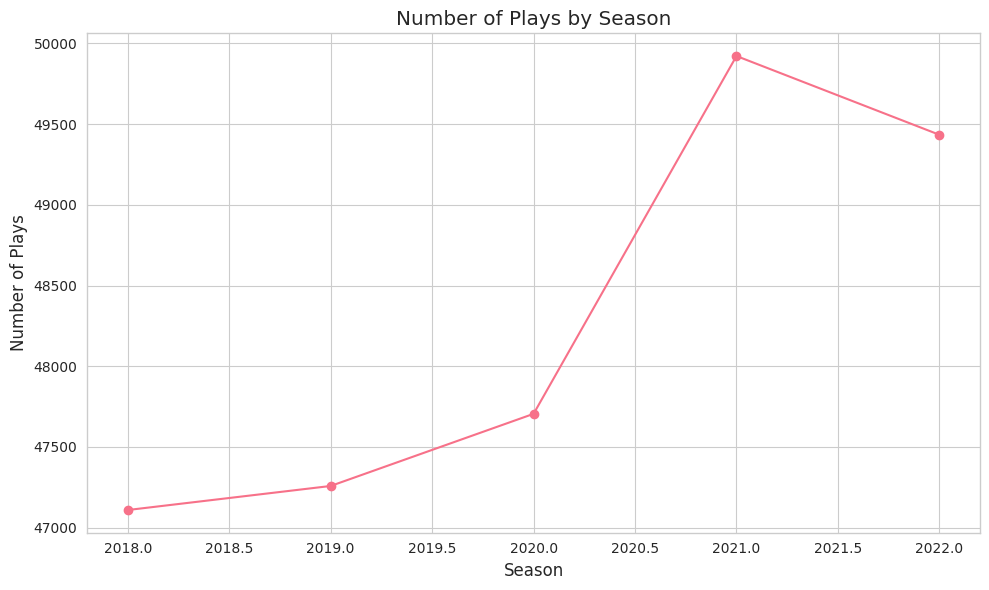

In [5]:
if 'plays_df' in locals() and 'season' in plays_df.columns:
    # Analyze plays by season
    season_counts = plays_df['season'].value_counts().sort_index()
    
    # Create line plot
    plt.figure(figsize=(10, 6))
    season_counts.plot(kind='line', marker='o')
    plt.title('Number of Plays by Season')
    plt.xlabel('Season')
    plt.ylabel('Number of Plays')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Injury Data Integration

Loaded 27455 injury records


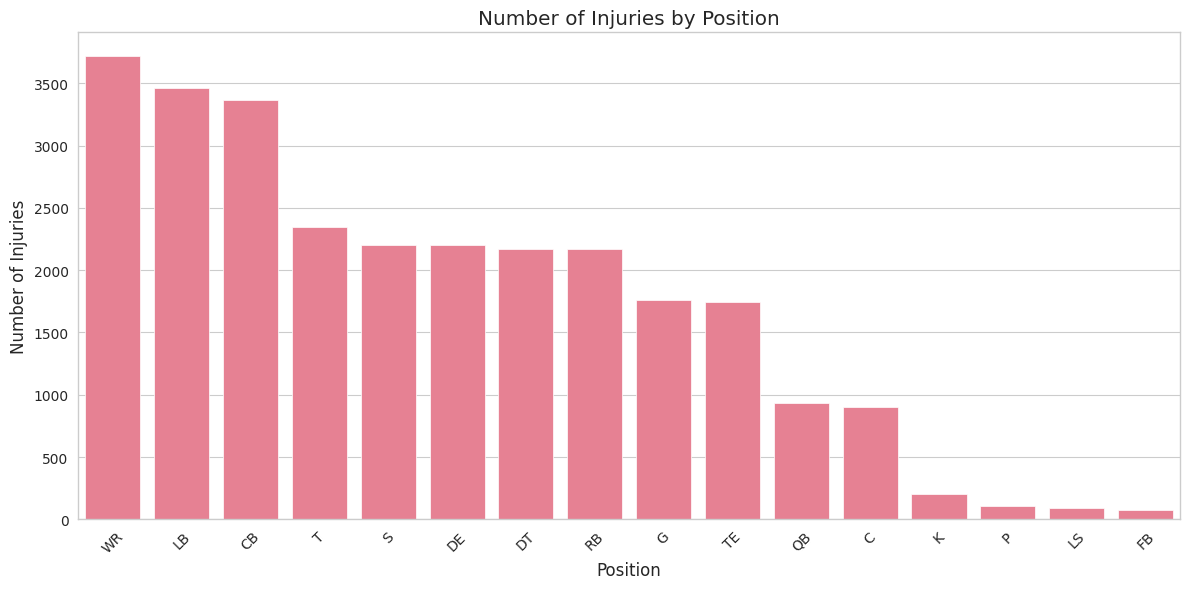

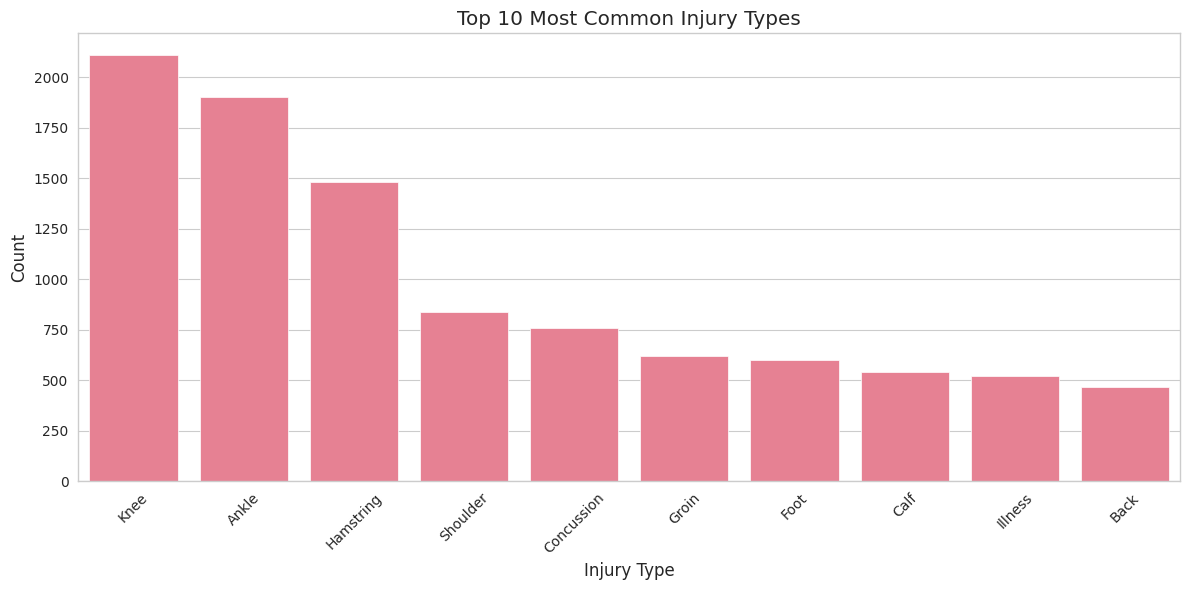

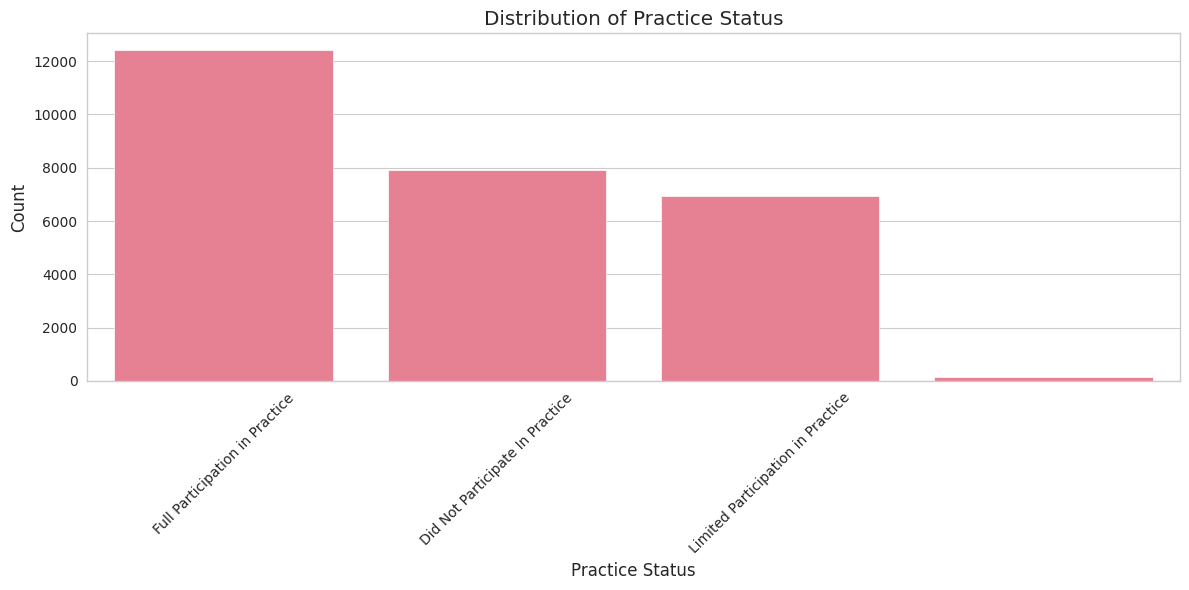

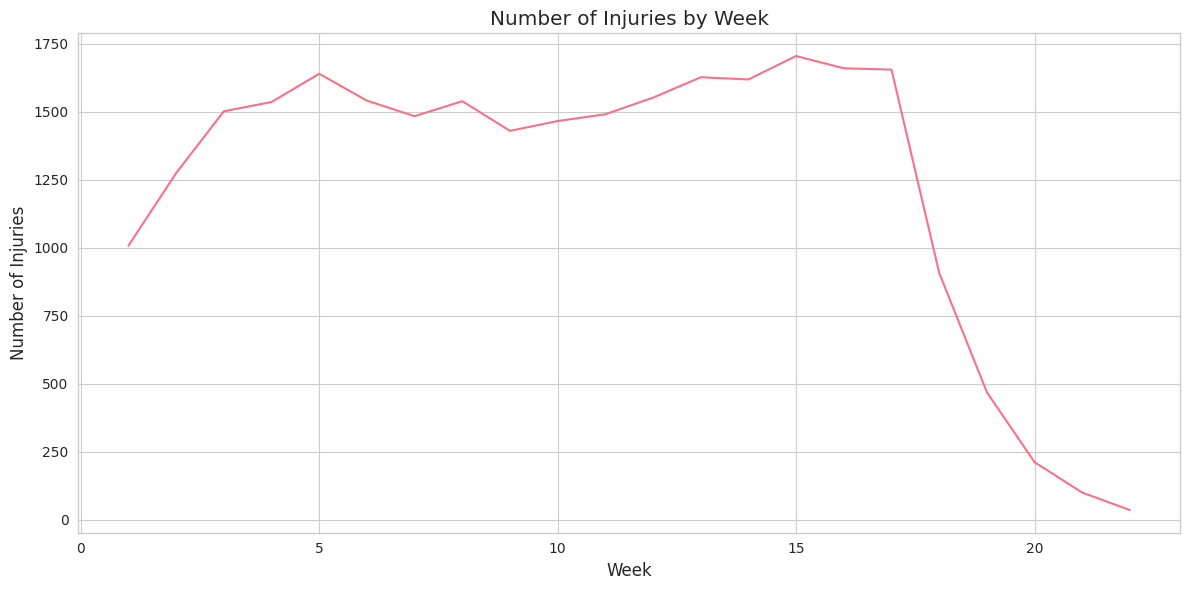


Injury Statistics:
Total injuries: 27455
Unique players injured: 2925
Unique positions: 16
Unique injury types: 109

Top 5 most common injuries:
Knee          2113
Ankle         1905
Hamstring     1484
Shoulder       840
Concussion     757
Name: report_primary_injury, dtype: int64


In [28]:
# Load raw injury data
raw_injury_path = Path('../data/injury_reports/nfl_injuries.csv')
if raw_injury_path.exists():
    injuries_df = pd.read_csv(raw_injury_path)
    print(f"Loaded {len(injuries_df)} injury records")
    
    # 1. Injury Analysis by Position
    plt.figure(figsize=(12, 6))
    position_counts = injuries_df['position'].value_counts()
    sns.barplot(x=position_counts.index, y=position_counts.values)
    plt.title('Number of Injuries by Position')
    plt.xlabel('Position')
    plt.ylabel('Number of Injuries')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. Injury Type Distribution
    plt.figure(figsize=(12, 6))
    injury_type_counts = injuries_df['report_primary_injury'].value_counts().head(10)
    sns.barplot(x=injury_type_counts.index, y=injury_type_counts.values)
    plt.title('Top 10 Most Common Injury Types')
    plt.xlabel('Injury Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 3. Practice Status Distribution
    plt.figure(figsize=(12, 6))
    practice_status_counts = injuries_df['practice_status'].value_counts()
    sns.barplot(x=practice_status_counts.index, y=practice_status_counts.values)
    plt.title('Distribution of Practice Status')
    plt.xlabel('Practice Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 4. Injuries by Week
    plt.figure(figsize=(12, 6))
    week_counts = injuries_df.groupby('week').size()
    sns.lineplot(x=week_counts.index, y=week_counts.values)
    plt.title('Number of Injuries by Week')
    plt.xlabel('Week')
    plt.ylabel('Number of Injuries')
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print("\nInjury Statistics:")
    print(f"Total injuries: {len(injuries_df)}")
    print(f"Unique players injured: {injuries_df['full_name'].nunique()}")
    print(f"Unique positions: {injuries_df['position'].nunique()}")
    print(f"Unique injury types: {injuries_df['report_primary_injury'].nunique()}")
    print("\nTop 5 most common injuries:")
    print(injuries_df['report_primary_injury'].value_counts().head())
else:
    print(f"Injury data not found at {raw_injury_path}")

## Save Visualizations

In [7]:
# Create reports directory if it doesn't exist
reports_dir = Path('reports/figures')
reports_dir.mkdir(parents=True, exist_ok=True)

# Save the last figure
if 'plt' in locals() and len(plt.get_fignums()) > 0:
    plt.savefig(reports_dir / 'yards_to_go_by_down.png')
    print(f"Saved visualization to {reports_dir / 'yards_to_go_by_down.png'}")